# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# shape of Median Household Income 2015
print(f"Shape of Median Household Income 2015 is: {df_hh_income.shape}")

Shape of Median Household Income 2015 is: (29322, 3)


In [ ]:
print(f"Shape of people below poverty level is: {df_pct_poverty.shape}")

Shape of people below poverty level is: (29329, 3)


In [ ]:
print(f"Shape of Over 25 completed high school is: {df_pct_completed_hs.shape}")

Shape of Over 25 completed high school is: (29329, 3)


In [ ]:
print(f"Shape of Share of Race by City is: {df_share_race_city.shape}")

Shape of Share of Race by City is: (29268, 7)


In [ ]:
print(f"Shape of death fatalities by police is: {df_fatalities.shape}")

Shape of death fatalities by police is: (2535, 14)


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.isna().any()

,0
Geographic Area,False
City,False
Median Income,True


In [ ]:
df_hh_income[df_hh_income['Median Income'].isna()]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [ ]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)

In [ ]:
df_pct_poverty.isna().any()

,0
Geographic Area,False
City,False
poverty_rate,False


In [ ]:
df_pct_completed_hs.isna().any()

,0
Geographic Area,False
City,False
percent_completed_hs,False


In [ ]:
df_share_race_city.isna().any()

,0
Geographic area,False
City,False
share_white,False
share_black,False
share_native_american,False
share_asian,False
share_hispanic,False


In [ ]:
df_fatalities.isnull().any()

,0
id,False
name,False
date,False
manner_of_death,False
armed,True
age,True
gender,False
race,True
city,False
state,False


In [ ]:
df_fatalities[df_fatalities['armed'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,NaN,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,NaN,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,NaN,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,NaN,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,NaN,NaN,M,NaN,East Point,GA,False,undetermined,NaN,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,NaN,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,NaN,43.00,M,NaN,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,NaN,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,NaN,40.00,M,NaN,Lake View,SC,False,undetermined,NaN,False


In [ ]:
df_fatalities['armed'] = df_fatalities['armed'].fillna("Nothing Availabe")

In [ ]:
df_fatalities[df_fatalities['age'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


In [ ]:
df_fatalities['age'] = df_fatalities['age'].fillna(0)

In [ ]:
df_fatalities['age'].isna().any()

False

In [ ]:
df_fatalities[df_fatalities['race'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.00,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.00,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.00,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.00,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
398,503,James Anthony Morris,31/05/15,shot,gun,40.00,M,NaN,Medford,OR,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,2811,Matthew Folden,27/07/17,shot,knife,31.00,M,NaN,Wenatchee,WA,False,other,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,NaN,Albuquerque,NM,False,attack,Car,False


In [ ]:
df_fatalities['race'] = df_fatalities['race'].fillna('Not Available')

In [ ]:
df_fatalities[df_fatalities['flee'].isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
857,1007,Ernesto Gamino,13/11/15,shot,undetermined,25.00,M,H,Jurupa Valley,CA,False,undetermined,NaN,False
874,1020,Randy Allen Smith,19/11/15,shot,gun,34.00,M,B,Manatee,FL,False,attack,NaN,False
898,1042,Zachary Grigsby,29/11/15,shot,gun,29.00,M,W,Lincoln,NE,False,attack,NaN,False
935,1083,Roy Carreon,12/12/15,shot,knife,49.00,M,H,San Bernardino,CA,False,attack,NaN,False
936,1086,Efrain Villanueva,12/12/15,shot,unknown weapon,0.00,M,Not Available,Aurora,CO,False,attack,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2749,Carroll Tuttle,05/07/17,shot,gun,51.00,M,W,Madison,ME,False,attack,NaN,False
2468,2745,Dejuan Guillory,06/07/17,shot,undetermined,27.00,M,Not Available,Mamou,LA,False,undetermined,NaN,False
2482,2767,Caleb Edward Blaylock,11/07/17,shot,knife,27.00,M,Not Available,Las Vegas,NV,True,undetermined,NaN,True
2487,2772,James Gerald Davis,12/07/17,shot,Nothing Availabe,40.00,M,Not Available,Lake View,SC,False,undetermined,NaN,False


In [ ]:
df_fatalities['flee'] = df_fatalities['flee'].fillna('Not Available')

In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty.sample(10)

,Geographic Area,City,poverty_rate
28558,WI,Elderon village,25.5
1512,AR,Delaplaine town,0
11742,MI,Bear Lake CDP,7.8
19622,OH,Harrod village,15.7
23096,PA,Turtle Creek borough,22
24627,TX,Bayside town,24.7
14737,MT,Carlton CDP,0
24290,TN,Huntsville town,28.5
6117,IL,Avon village,14.1
21673,PA,Boyertown borough,13.4


In [ ]:
# Cleaning some entries
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace('-', 0)

In [ ]:
# Converting column to float
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [ ]:
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

In [ ]:
state_poverty_sorted = state_poverty.sort_values('poverty_rate', ascending=False)

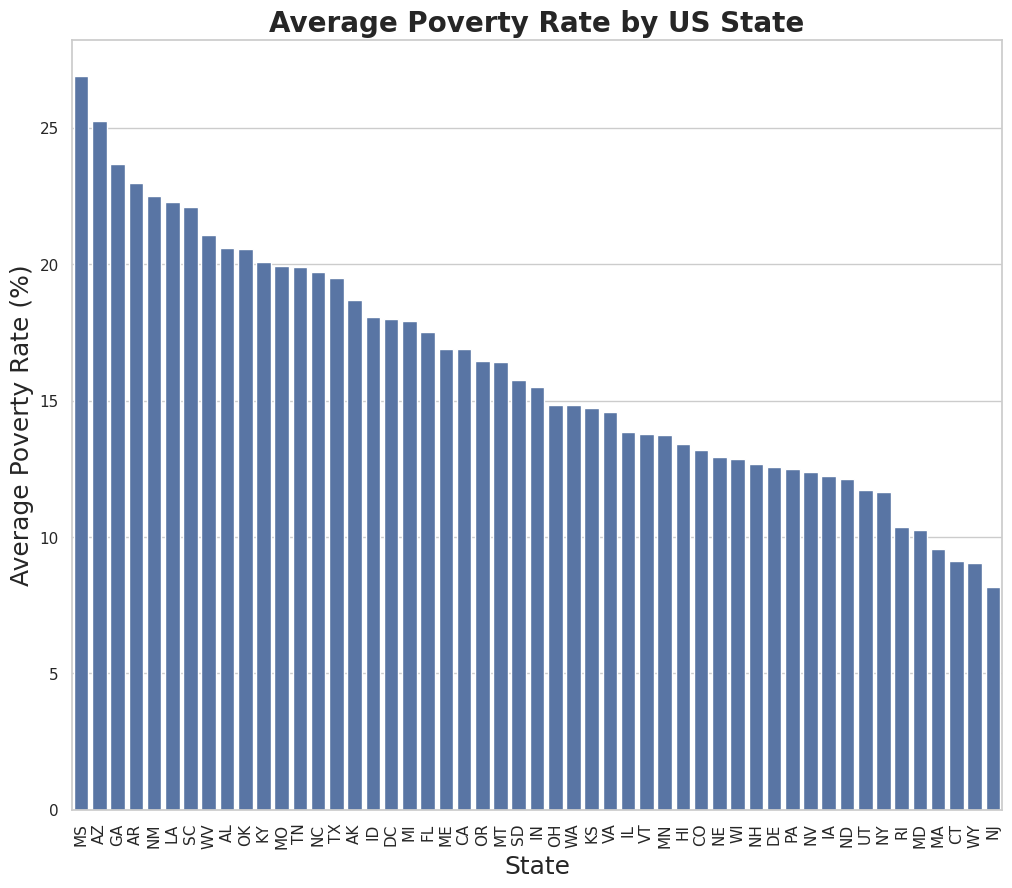

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Geographic Area', y='poverty_rate', data=state_poverty_sorted)
plt.xlabel('State', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Average Poverty Rate (%)', fontsize=18)
plt.title('Average Poverty Rate by US State', fontdict={'size':20, 'weight':'bold'})
plt.show()


In [ ]:
print(f"State with the highest poverty rate: {state_poverty_sorted.iloc[0]['Geographic Area']} ({state_poverty_sorted.iloc[0]['poverty_rate']:.1f}%)")
print(f"State with the lowest poverty rate: {state_poverty_sorted.iloc[-1]['Geographic Area']} ({state_poverty_sorted.iloc[-1]['poverty_rate']:.1f}%)")

State with the highest poverty rate: MS (26.9%)
State with the lowest poverty rate: NJ (8.2%)


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_completed_hs.sample(5)

,Geographic Area,City,percent_completed_hs
20758,OK,Konawa city,79.7
16710,NM,Radium Springs CDP,77.7
282,AL,Jemison city,77.8
3937,CT,Danielson borough,79.4
14513,MO,Seneca city,85.3


In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', 0)

In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

In [ ]:
# Group by state and calculate the average graduation rate
df_state_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

In [ ]:
df_state_graduation_sorted = df_state_graduation.sort_values('percent_completed_hs')

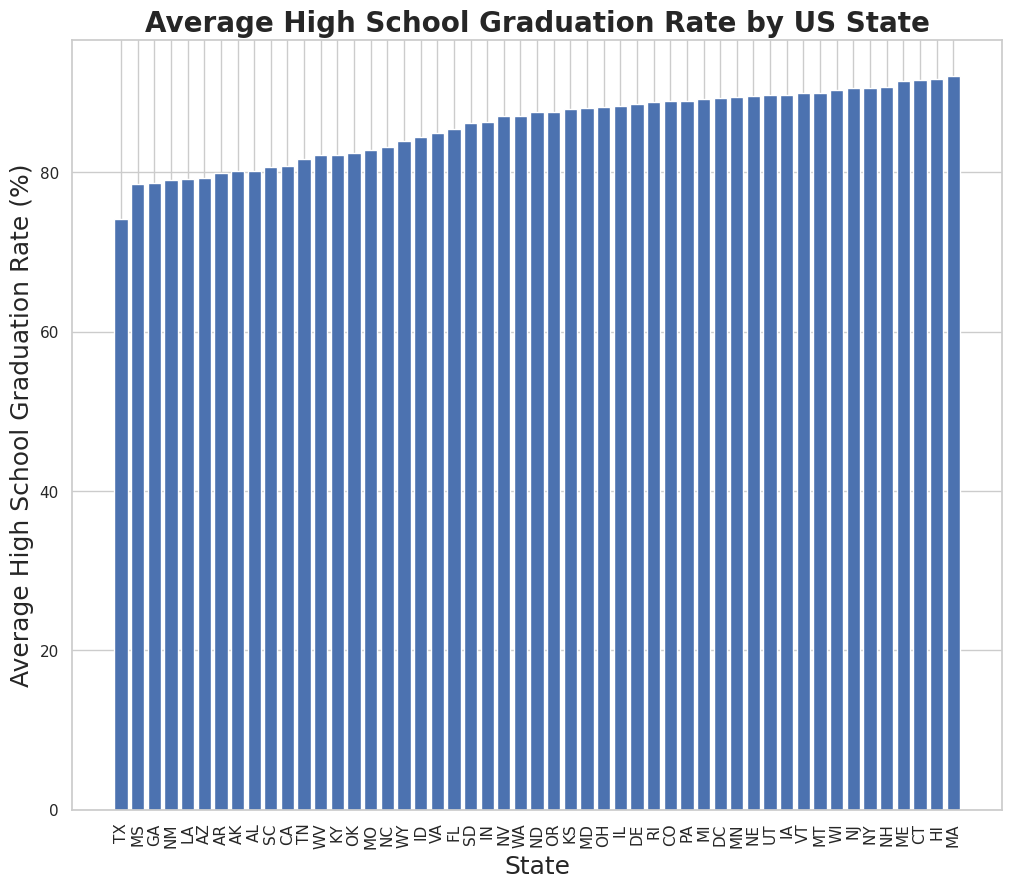

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(df_state_graduation_sorted['Geographic Area'], df_state_graduation_sorted['percent_completed_hs'])
plt.xlabel('State', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Average High School Graduation Rate (%)', fontsize=18)
plt.title('Average High School Graduation Rate by US State', fontdict={'size':20, 'weight':'bold'})
plt.show()

In [ ]:
print(f"State with the lowest graduation rate: {df_state_graduation_sorted.iloc[0]['Geographic Area']} ({df_state_graduation_sorted.iloc[0]['percent_completed_hs']:.1f}%)")
print(f"State with the highest graduation rate: {df_state_graduation_sorted.iloc[-1]['Geographic Area']} ({df_state_graduation_sorted.iloc[-1]['percent_completed_hs']:.1f}%)")

State with the lowest graduation rate: TX (74.1%)
State with the highest graduation rate: MA (92.0%)


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


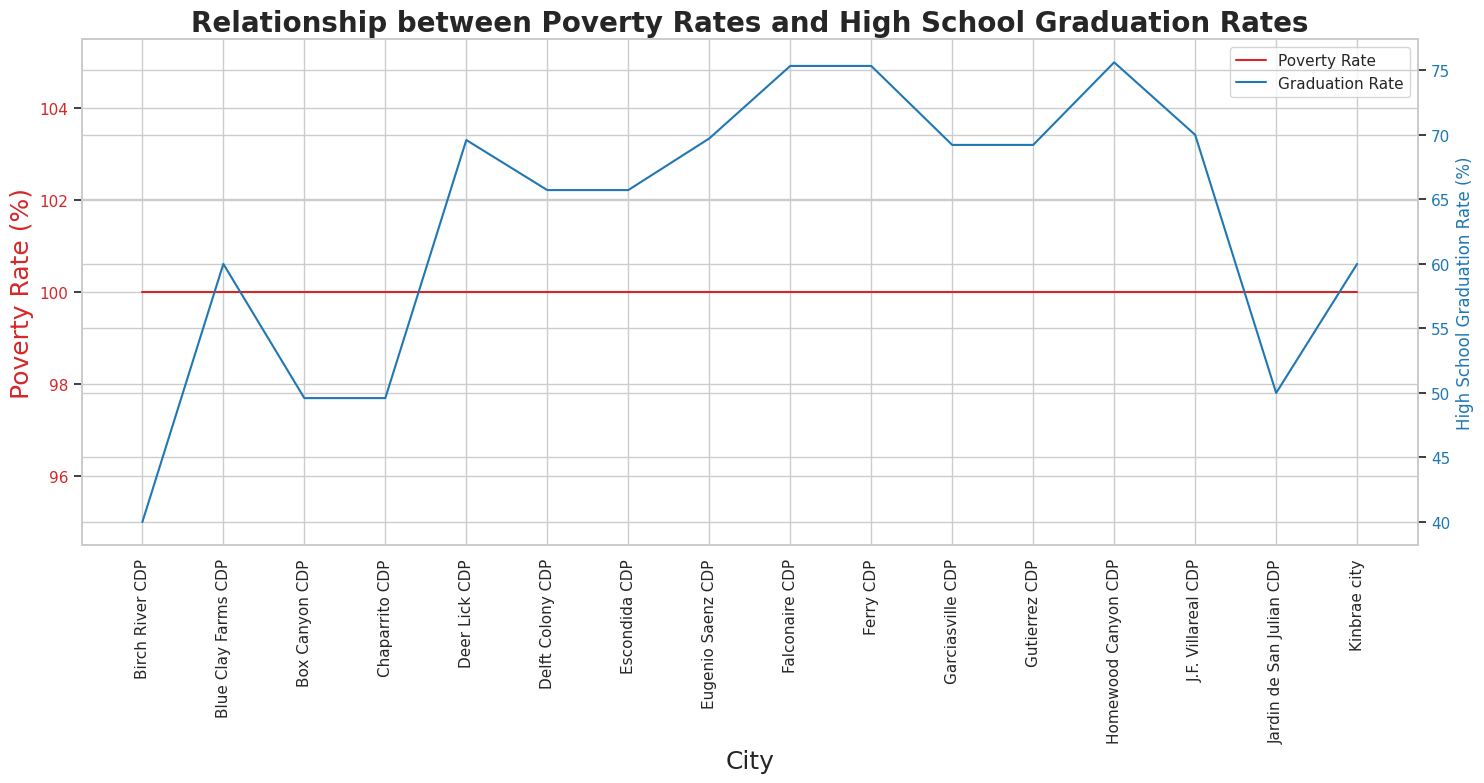

In [ ]:
# Merge the dataframes
df_combined = pd.merge(df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City'])
df_combined_sorted = df_combined.sort_values('City')

# Aggregate the data by city
df_city_agg = df_combined.groupby('City').agg({
    'poverty_rate': 'mean',
    'percent_completed_hs': 'mean'
}).reset_index()

# Filter the data to include only the top 20 cities
top_cities = df_city_agg.nlargest(20, 'poverty_rate')['City']
df_city_agg = df_city_agg[df_city_agg['City'].isin(top_cities)]

# Apply a moving average to smooth the lines
window_size = 5
df_city_agg['poverty_rate_smooth'] = df_city_agg['poverty_rate'].rolling(window=window_size).mean()
df_city_agg['percent_completed_hs_smooth'] = df_city_agg['percent_completed_hs'].rolling(window=window_size).mean()

# figure and axes
fig, ax1 = plt.subplots(figsize=(15, 8))

# poverty rate plot
color = 'tab:red'
ax1.set_xlabel('City', fontsize=18)
ax1.set_ylabel('Poverty Rate (%)', color=color, fontsize=18)
line1, = ax1.plot(df_city_agg['City'], df_city_agg['poverty_rate_smooth'], color=color, label='Poverty Rate')
ax1.tick_params(axis='y', labelcolor=color)

# second y-axis for graduation rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rate (%)', color=color)
line2, = ax2.plot(df_city_agg['City'], df_city_agg['percent_completed_hs_smooth'], color=color, label='Graduation Rate')
ax2.tick_params(axis='y', labelcolor=color)
plt.title(
    'Relationship between Poverty Rates and High School Graduation Rates'
    , fontdict={'size':20, 'weight':'bold'})

ax1.tick_params(axis='x', rotation=90)


ax1.legend([line1, line2], ['Poverty Rate', 'Graduation Rate'], loc='upper right')
plt.tight_layout()  # Add this to ensure labels fit
plt.show()

In [ ]:
df_combined = pd.merge(df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City'])
df_combined_sorted = df_combined.sort_values('City')

# Calculate correlation coefficient
correlation = df_combined['poverty_rate'].corr(df_combined['percent_completed_hs'])
print(f"Correlation coefficient between poverty rate and graduation rate: {correlation:.2f}")

Correlation coefficient between poverty rate and graduation rate: -0.38


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

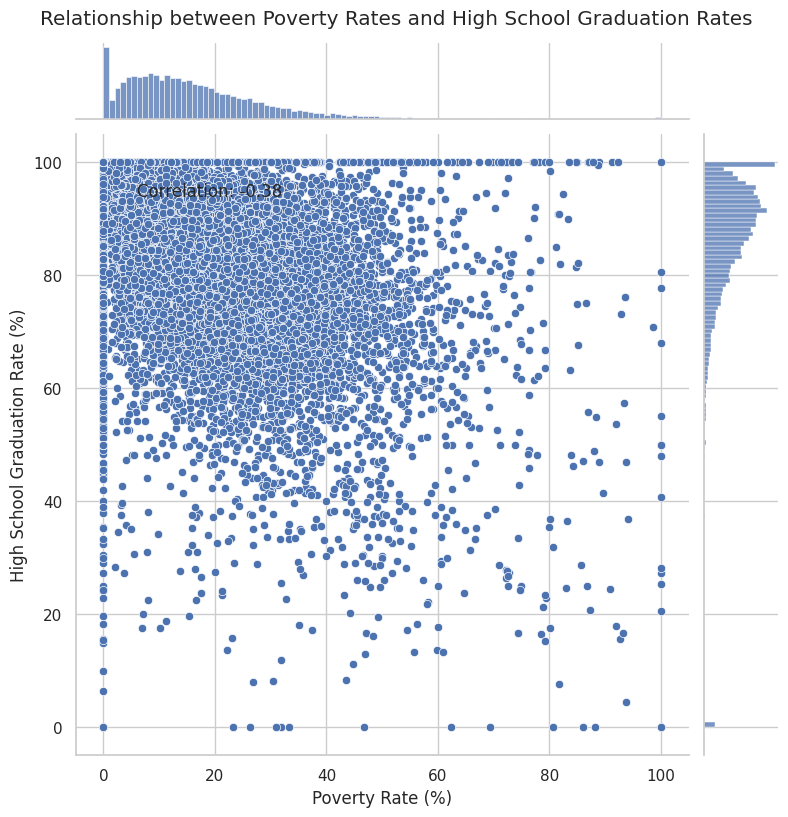

In [ ]:
# Jointplot
sns.set(style="whitegrid")
g = sns.jointplot(
    data=df_combined,
    x="poverty_rate",
    y="percent_completed_hs",
    kind="scatter",
    height=8,
    ratio=7
)

# Set labels and title
g.set_axis_labels("Poverty Rate (%)", "High School Graduation Rate (%)")
plt.suptitle("Relationship between Poverty Rates and High School Graduation Rates", y=1.02)

# Add correlation coefficient
corr = df_combined['poverty_rate'].corr(df_combined['percent_completed_hs'])
g.ax_joint.annotate(f'Correlation: {corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

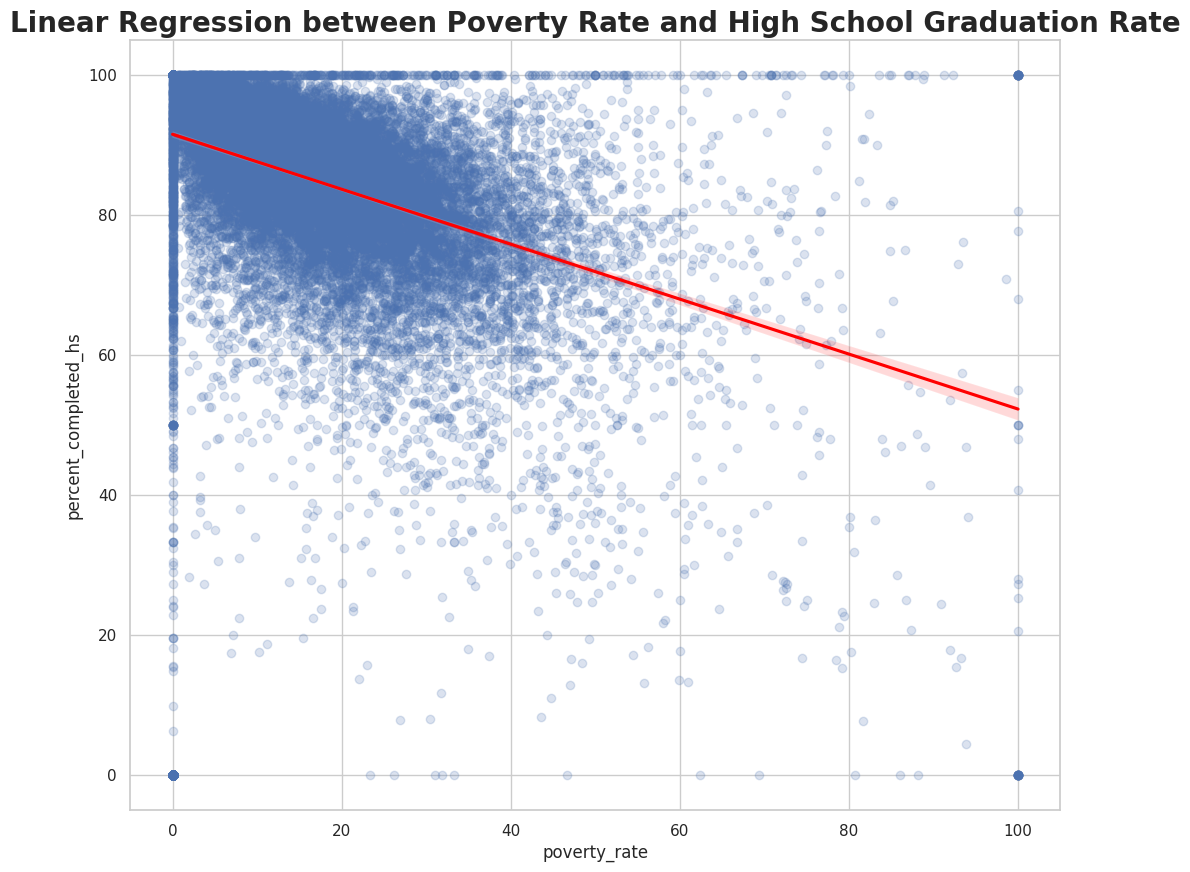

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
sns.regplot(
    x="poverty_rate", y="percent_completed_hs",
    data=df_combined, scatter_kws={'alpha': 0.2},
    line_kws={'color':'red'})

plt.title(
    "Linear Regression between Poverty Rate and High School Graduation Rate",
    fontdict={'size':20, 'weight':'bold'}
    )
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
df_share_race_city.sample(5)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
11353,MD,Sharpsburg town,95.7,0.4,0.1,0,2.1
7873,IN,Ogden Dunes town,96.1,1.1,0.1,1.3,3.2
1819,AR,Rudy town,93.4,0,0,0,6.6
11310,MD,Quantico CDP,96.2,3,0,0,5.3
5484,GA,Phillipsburg CDP,5.2,94.2,0.1,0.1,1.7


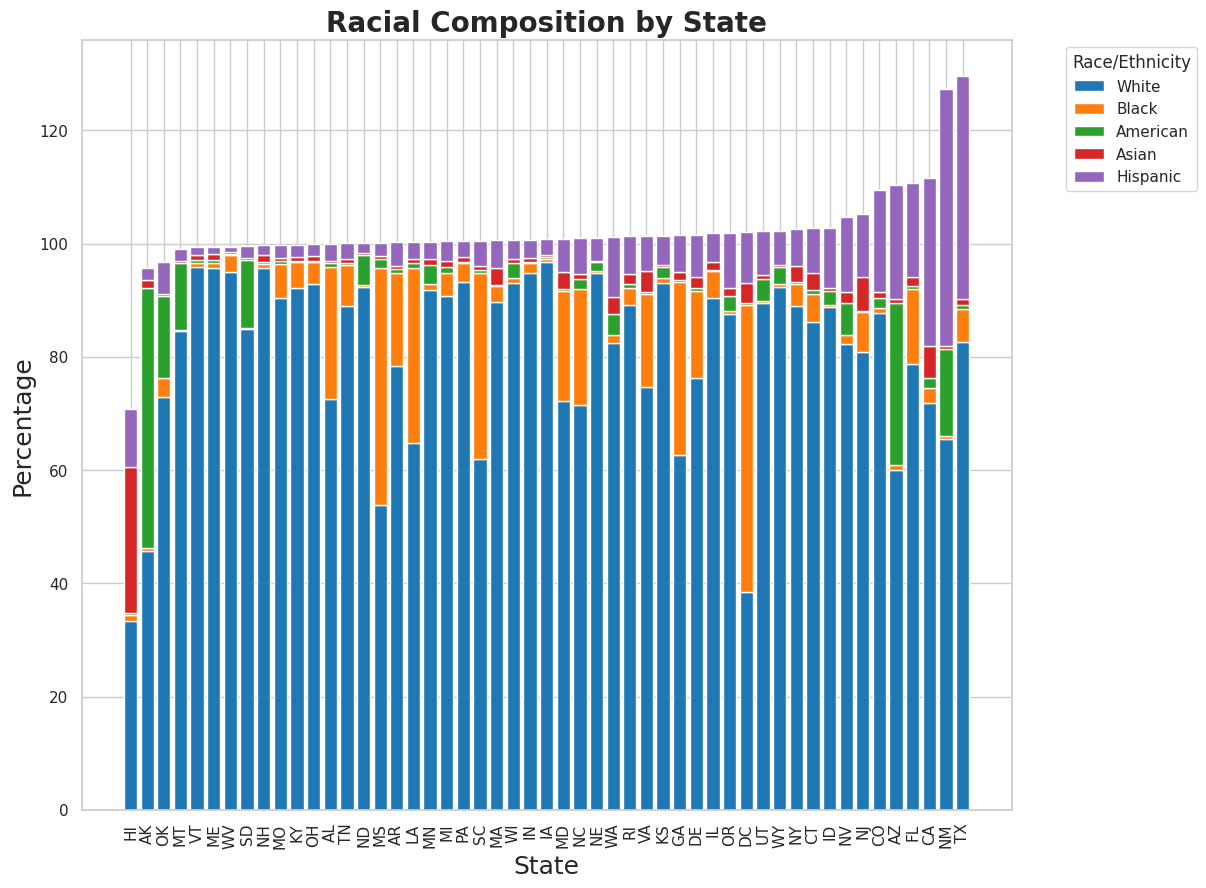

In [ ]:
# Convert columns to numeric
df_share_race_city[
    ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
    ] = df_share_race_city[
        ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
        ].apply(pd.to_numeric, errors='coerce')

# Group by state and calculate mean shares
df_state_race = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean().reset_index()

# Sort states by total share
df_state_race['total'] = df_state_race.iloc[:, 1:].sum(axis=1)
df_state_race_sorted = df_state_race.sort_values('total', ascending=True)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bottom = np.zeros(len(df_state_race_sorted))

for column, color in zip(df_state_race_sorted.columns[1:], colors):
    ax.bar(df_state_race_sorted['Geographic area'], df_state_race_sorted[column], bottom=bottom, label=column.split('_')[-1].capitalize(), color=color)
    bottom += df_state_race_sorted[column]

ax.set_title('Racial Composition by State', fontdict={'size':20, 'weight':'bold'})
ax.set_xlabel('State', fontsize=18)
ax.set_ylabel('Percentage', fontsize=18)
ax.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=90)
plt.show()

In [ ]:
# Print states with highest and lowest percentages for each race
races = ['white', 'black', 'native_american', 'asian', 'hispanic']
for race in races:
    col = f'share_{race}'
    highest = df_state_race.loc[df_state_race[col].idxmax()]
    lowest = df_state_race.loc[df_state_race[col].idxmin()]
    print(f"\n{race.capitalize()}:")
    print(f"Highest: {highest['Geographic area']} ({highest[col]:.1f}%)")
    print(f"Lowest: {lowest['Geographic area']} ({lowest[col]:.1f}%)")


White:
Highest: IA (96.7%)
Lowest: HI (33.4%)

Black:
Highest: DC (50.7%)
Lowest: MT (0.2%)

Native_american:
Highest: AK (45.9%)
Lowest: PA (0.2%)

Asian:
Highest: HI (25.7%)
Lowest: NE (0.3%)

Hispanic:
Highest: NM (45.4%)
Lowest: WV (0.9%)


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
858,1008,Matthew Coleman,13/11/15,shot,gun,25.00,M,W,Eden,GA,False,attack,Foot,False
322,416,Joshua Deysie,29/04/15,shot,gun,33.00,M,H,Mesa,AZ,True,attack,Not fleeing,False
2329,2586,Isabelle Duval,16/05/17,shot,gun,41.00,F,W,Washington,DC,False,attack,Not fleeing,False
54,102,Jose Antonio Espinoza Ruiz,23/01/15,shot,knife,56.00,M,H,Levelland,TX,False,other,Not fleeing,False
413,519,Joe Nevels,06/06/15,shot,box cutter,42.00,M,W,Midland,TX,True,other,Not fleeing,False


In [ ]:
df_fatalities['age'] = df_fatalities['age'].astype(int)

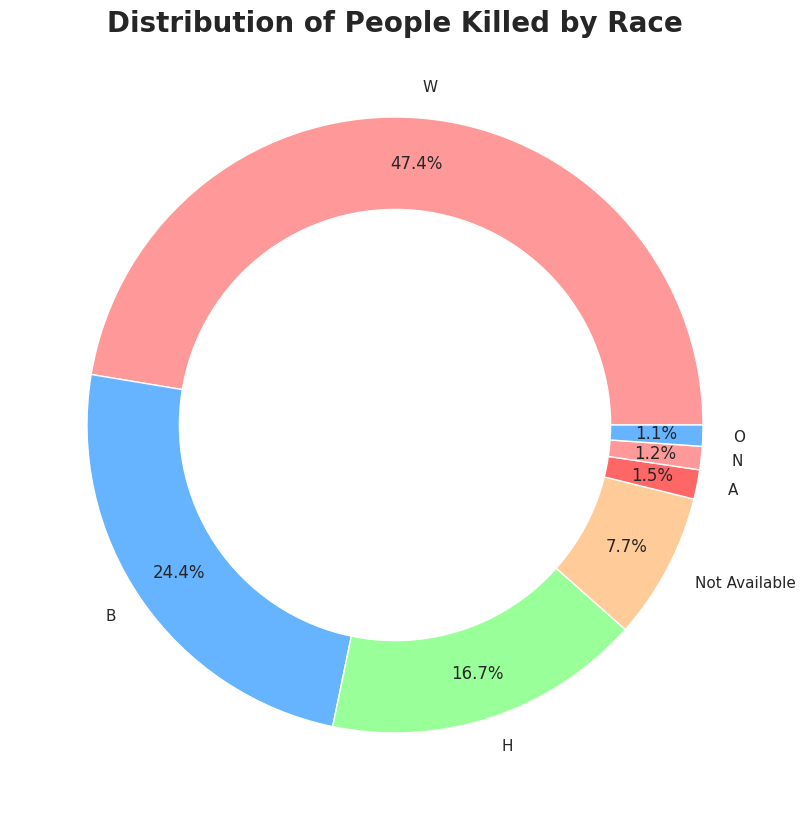

In [ ]:
race_counts = df_fatalities['race'].value_counts()

plt.figure(figsize=(12, 10))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666']
plt.pie(race_counts.values, labels=race_counts.index, colors=colors,
        autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.5))
plt.title("Distribution of People Killed by Race", fontdict={'size':20, 'weight':'bold'})

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

In [ ]:
total = race_counts.sum()
for race, count in race_counts.items():
    percentage = (count / total) * 100
    print(f"{race}: {count} ({percentage:.1f}%)")

W: 1201 (47.4%)
B: 618 (24.4%)
H: 423 (16.7%)
Not Available: 195 (7.7%)
A: 39 (1.5%)
N: 31 (1.2%)
O: 28 (1.1%)


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

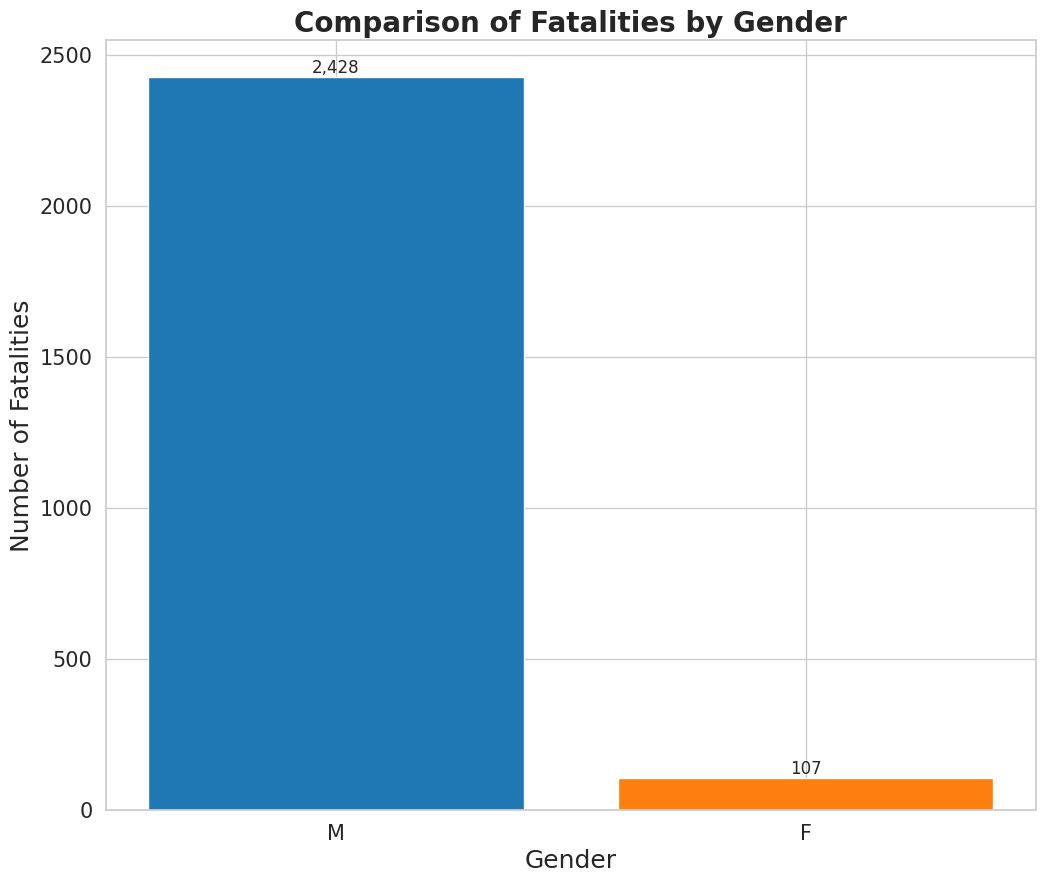

In [ ]:
# occurrences of each gender
gender_counts = df_fatalities['gender'].value_counts()

# percentages and ratio
male_percentage = (gender_counts['M'] / gender_counts.sum()) * 100
female_percentage = (gender_counts['F'] / gender_counts.sum()) * 100
ratio = gender_counts['M'] / gender_counts['F']


plt.figure(figsize=(12, 10))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['#1f77b4', '#ff7f0e'])

# value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

plt.title('Comparison of Fatalities by Gender', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Number of Fatalities', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# counts and percentages
print(f"Male fatalities: {gender_counts['M']:,} ({male_percentage:.1f}%)")
print(f"Female fatalities: {gender_counts['F']:,} ({female_percentage:.1f}%)")
print(f"Ratio of male to female fatalities: {ratio:.2f} to 1")

Male fatalities: 2,428 (95.8%)
Female fatalities: 107 (4.2%)
Ratio of male to female fatalities: 22.69 to 1


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

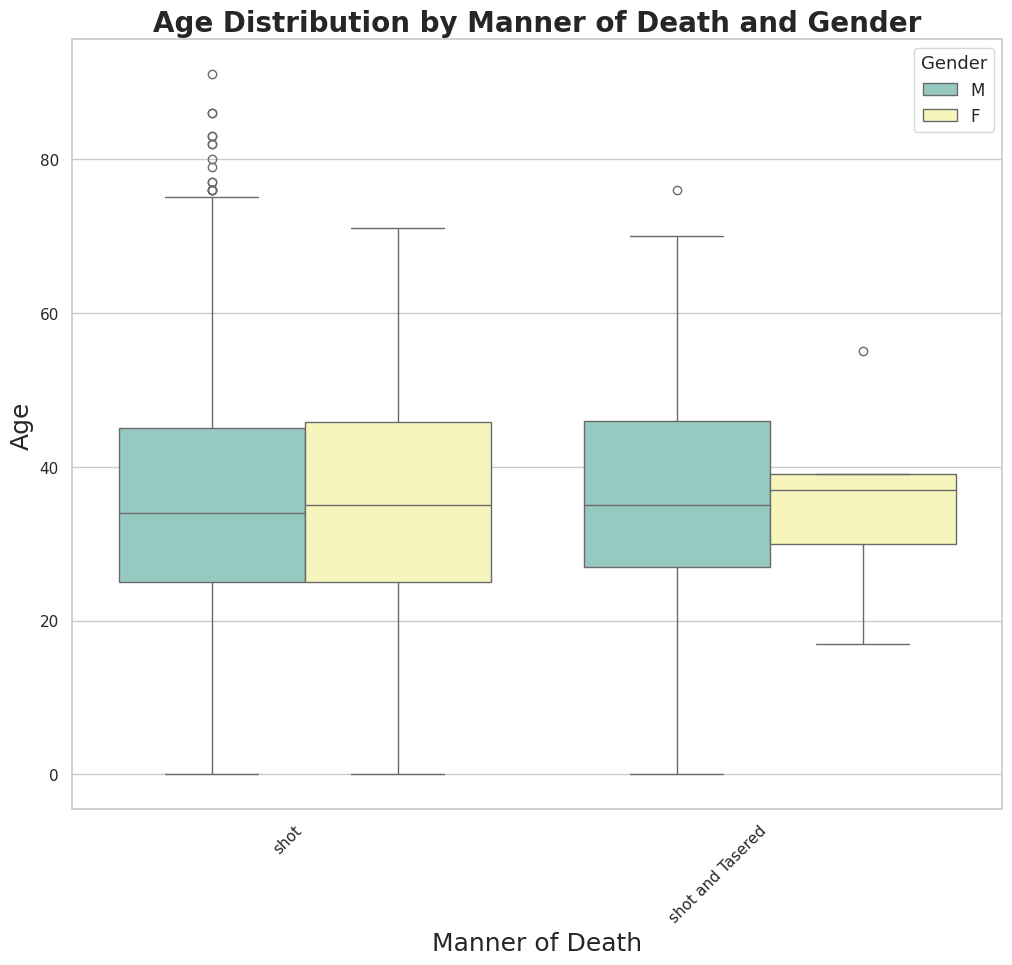

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities, palette='Set3')

plt.title('Age Distribution by Manner of Death and Gender', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Manner of Death', fontsize=18)
plt.ylabel('Age', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', title_fontsize='13', fontsize='12')
plt.show()

From the plot we could see the manner of death by shot has no difference for both genders even though the central tendancy for women is slightly above males, while death by shot and tasered were mostly males.

In [ ]:
# summary statistics
summary = df_fatalities.groupby(['manner_of_death', 'gender'])['age'].describe()
print(summary)

                           count  mean   std   min   25%   50%   75%   max
manner_of_death  gender                                                   
shot             F        102.00 35.54 14.19  0.00 25.00 35.00 45.75 71.00
                 M      2,261.00 35.44 14.37  0.00 25.00 34.00 45.00 91.00
shot and Tasered F          5.00 35.60 13.85 17.00 30.00 37.00 39.00 55.00
                 M        167.00 36.18 13.34  0.00 27.00 35.00 46.00 76.00


In [ ]:
# the most common manner of death for each gender
most_common_manner = df_fatalities.groupby(
    'gender')['manner_of_death'].value_counts().groupby(level=0).nlargest(1)
print("\nMost common manner of death by gender:")
print(most_common_manner)


Most common manner of death by gender:
gender  gender  manner_of_death
F       F       shot                102
M       M       shot               2261
Name: count, dtype: int64


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

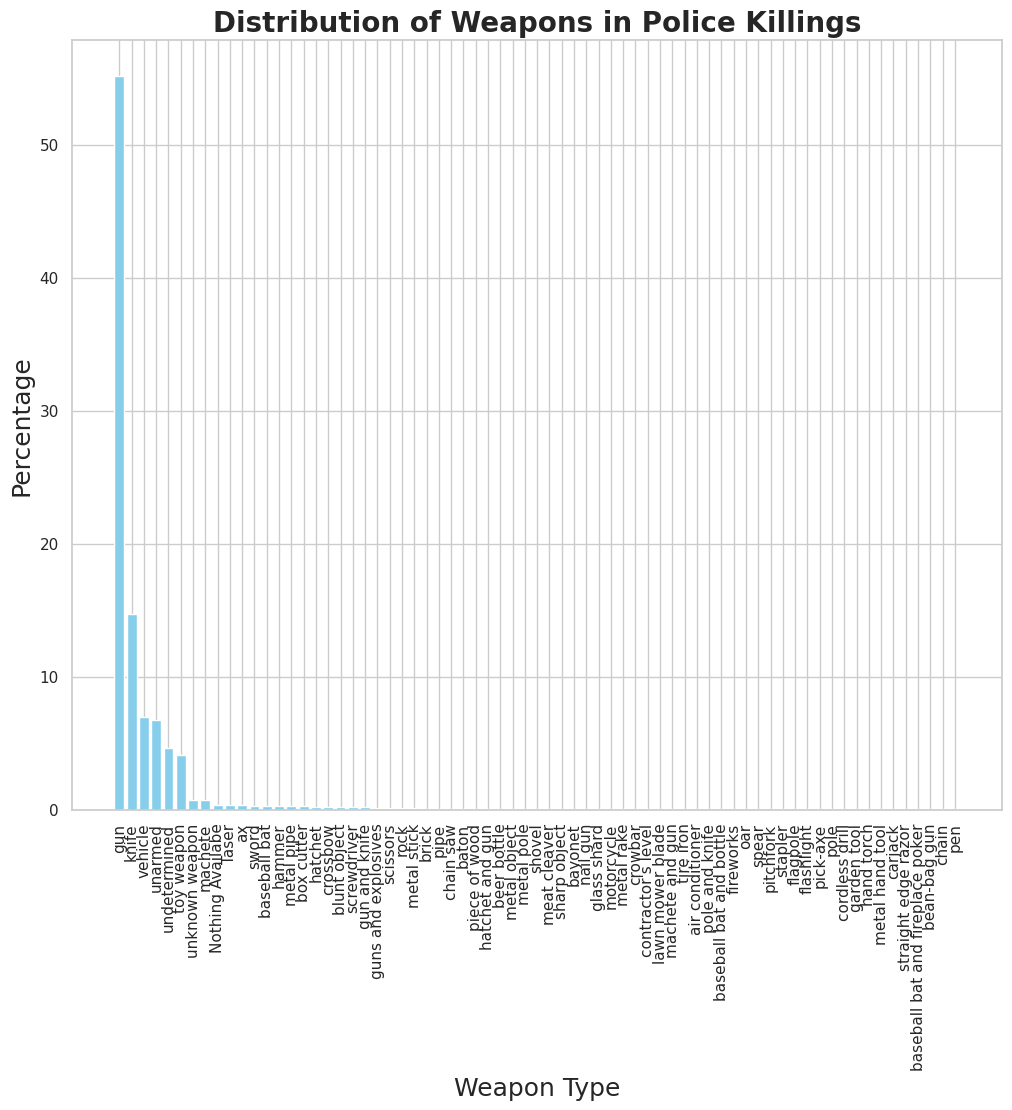

In [ ]:
# occurrences of each weapon type
weapon_counts = df_fatalities['armed'].value_counts()

# percentages
total = weapon_counts.sum()
weapon_percentages = (weapon_counts / total) * 100

plt.figure(figsize=(12, 10))
plt.bar(weapon_percentages.index, weapon_percentages, color='skyblue')
plt.xlabel('Weapon Type', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Distribution of Weapons in Police Killings', fontdict={'size':20, 'weight':'bold'})
plt.xticks(rotation=90)
plt.show()

In [ ]:
# percentage of armed individuals
armed_count = total - weapon_counts.get('unarmed', 0)
armed_percentage = (armed_count / total) * 100
print(f"\nPercentage of people armed: {armed_percentage:.1f}%")


Percentage of people armed: 93.3%


In [ ]:
# gun vs unarmed statistics
gun_count = weapon_counts.get('gun', 0)
unarmed_count = weapon_counts.get('unarmed', 0)

print(f"\nPeople armed with guns: {gun_count} ({(gun_count/total)*100:.1f}%)")
print(f"Unarmed people: {unarmed_count} ({(unarmed_count/total)*100:.1f}%)")
print(f"Ratio of gun-armed to unarmed: {gun_count/unarmed_count:.2f} to 1")



People armed with guns: 1398 (55.1%)
Unarmed people: 171 (6.7%)
Ratio of gun-armed to unarmed: 8.18 to 1


In [ ]:
print("Summary of weapons:\n")
for weapon, count in weapon_counts.items():
    print(f"{weapon}: {count} ({weapon_percentages[weapon]:.5f}%)")

Summary of weapons:

gun: 1398 (55.14793%)
knife: 373 (14.71400%)
vehicle: 177 (6.98225%)
unarmed: 171 (6.74556%)
undetermined: 117 (4.61538%)
toy weapon: 104 (4.10256%)
unknown weapon: 18 (0.71006%)
machete: 18 (0.71006%)
Nothing Availabe: 9 (0.35503%)
Taser: 9 (0.35503%)
ax: 9 (0.35503%)
sword: 8 (0.31558%)
baseball bat: 8 (0.31558%)
hammer: 7 (0.27613%)
metal pipe: 7 (0.27613%)
box cutter: 7 (0.27613%)
hatchet: 6 (0.23669%)
crossbow: 6 (0.23669%)
blunt object: 5 (0.19724%)
screwdriver: 5 (0.19724%)
gun and knife: 5 (0.19724%)
guns and explosives: 3 (0.11834%)
scissors: 3 (0.11834%)
rock: 3 (0.11834%)
metal stick: 3 (0.11834%)
brick: 2 (0.07890%)
pipe: 2 (0.07890%)
chain saw: 2 (0.07890%)
baton: 2 (0.07890%)
piece of wood: 2 (0.07890%)
hatchet and gun: 2 (0.07890%)
beer bottle: 2 (0.07890%)
metal object: 2 (0.07890%)
metal pole: 2 (0.07890%)
shovel: 2 (0.07890%)
meat cleaver: 2 (0.07890%)
sharp object: 2 (0.07890%)
bayonet: 1 (0.03945%)
nail gun: 1 (0.03945%)
glass shard: 1 (0.03945%

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

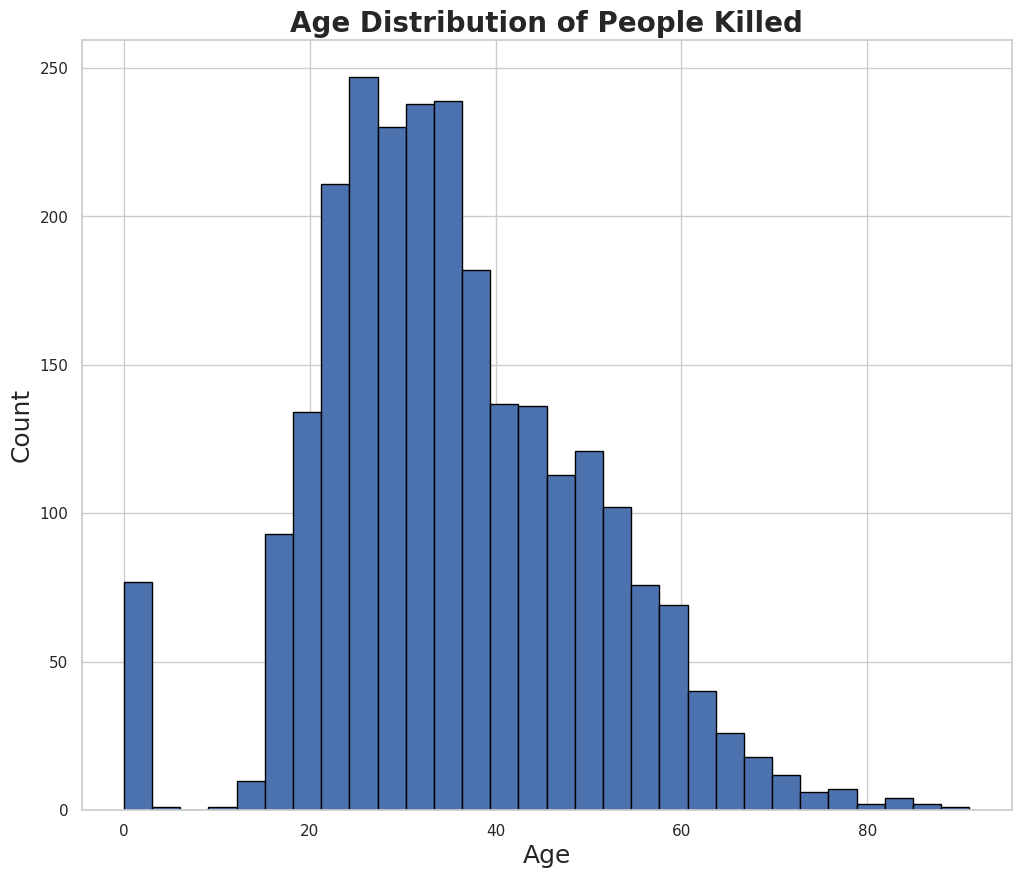

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(df_fatalities['age'], bins=30, edgecolor='black')
plt.title('Age Distribution of People Killed', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

In [ ]:
# percentage under 25 years old
under_25_count = df_fatalities[df_fatalities['age'] < 25]['age'].count()
total_count = df_fatalities['age'].count()
under_25_percentage = (under_25_count / total_count) * 100

print(f"\nPercentage of people killed under 25 years old: {under_25_percentage:.1f}%")


Percentage of people killed under 25 years old: 20.8%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

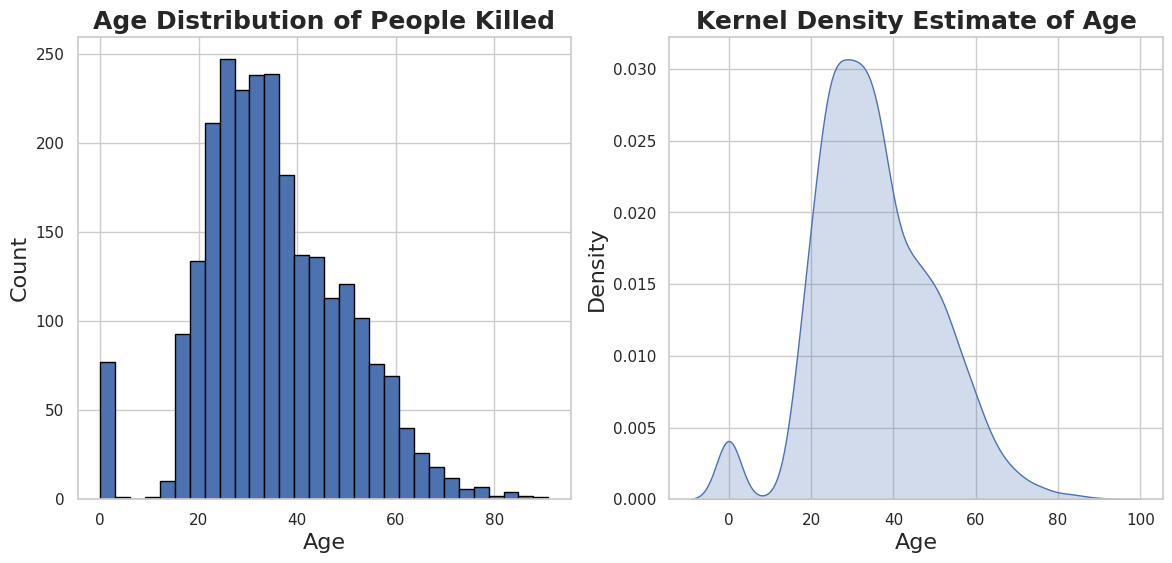

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df_fatalities['age'], bins=30, edgecolor='black')
ax1.set_title('Age Distribution of People Killed',
              fontdict={'size':18, 'weight':'bold'})
ax1.set_xlabel('Age', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)

sns.kdeplot(df_fatalities['age'], fill=True, ax=ax2)
ax2.set_title('Kernel Density Estimate of Age', fontdict={'size':18, 'weight':'bold'})
ax2.set_xlabel('Age', fontsize=16)
ax2.set_ylabel('Density', fontsize=16)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

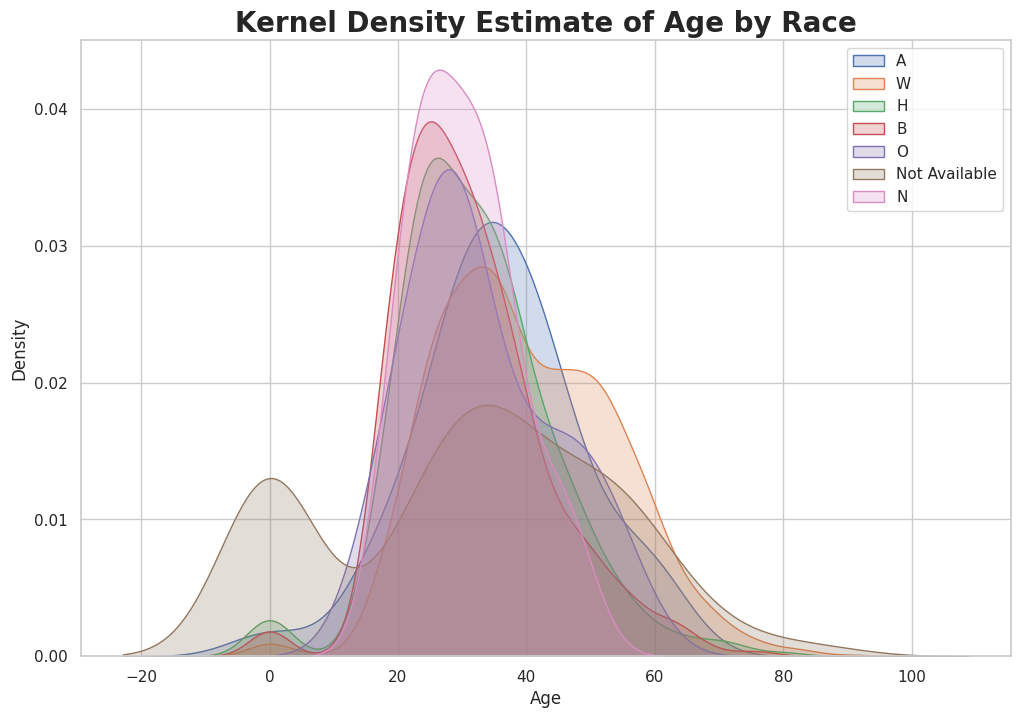

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for race in df_fatalities['race'].unique():
    race_data = df_fatalities[df_fatalities['race'] == race]['age']
    sns.kdeplot(race_data, fill=True, label=race, ax=ax)

ax.set_title('Kernel Density Estimate of Age by Race',
             fontdict={'size':20, 'weight':'bold'})
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()

plt.show()

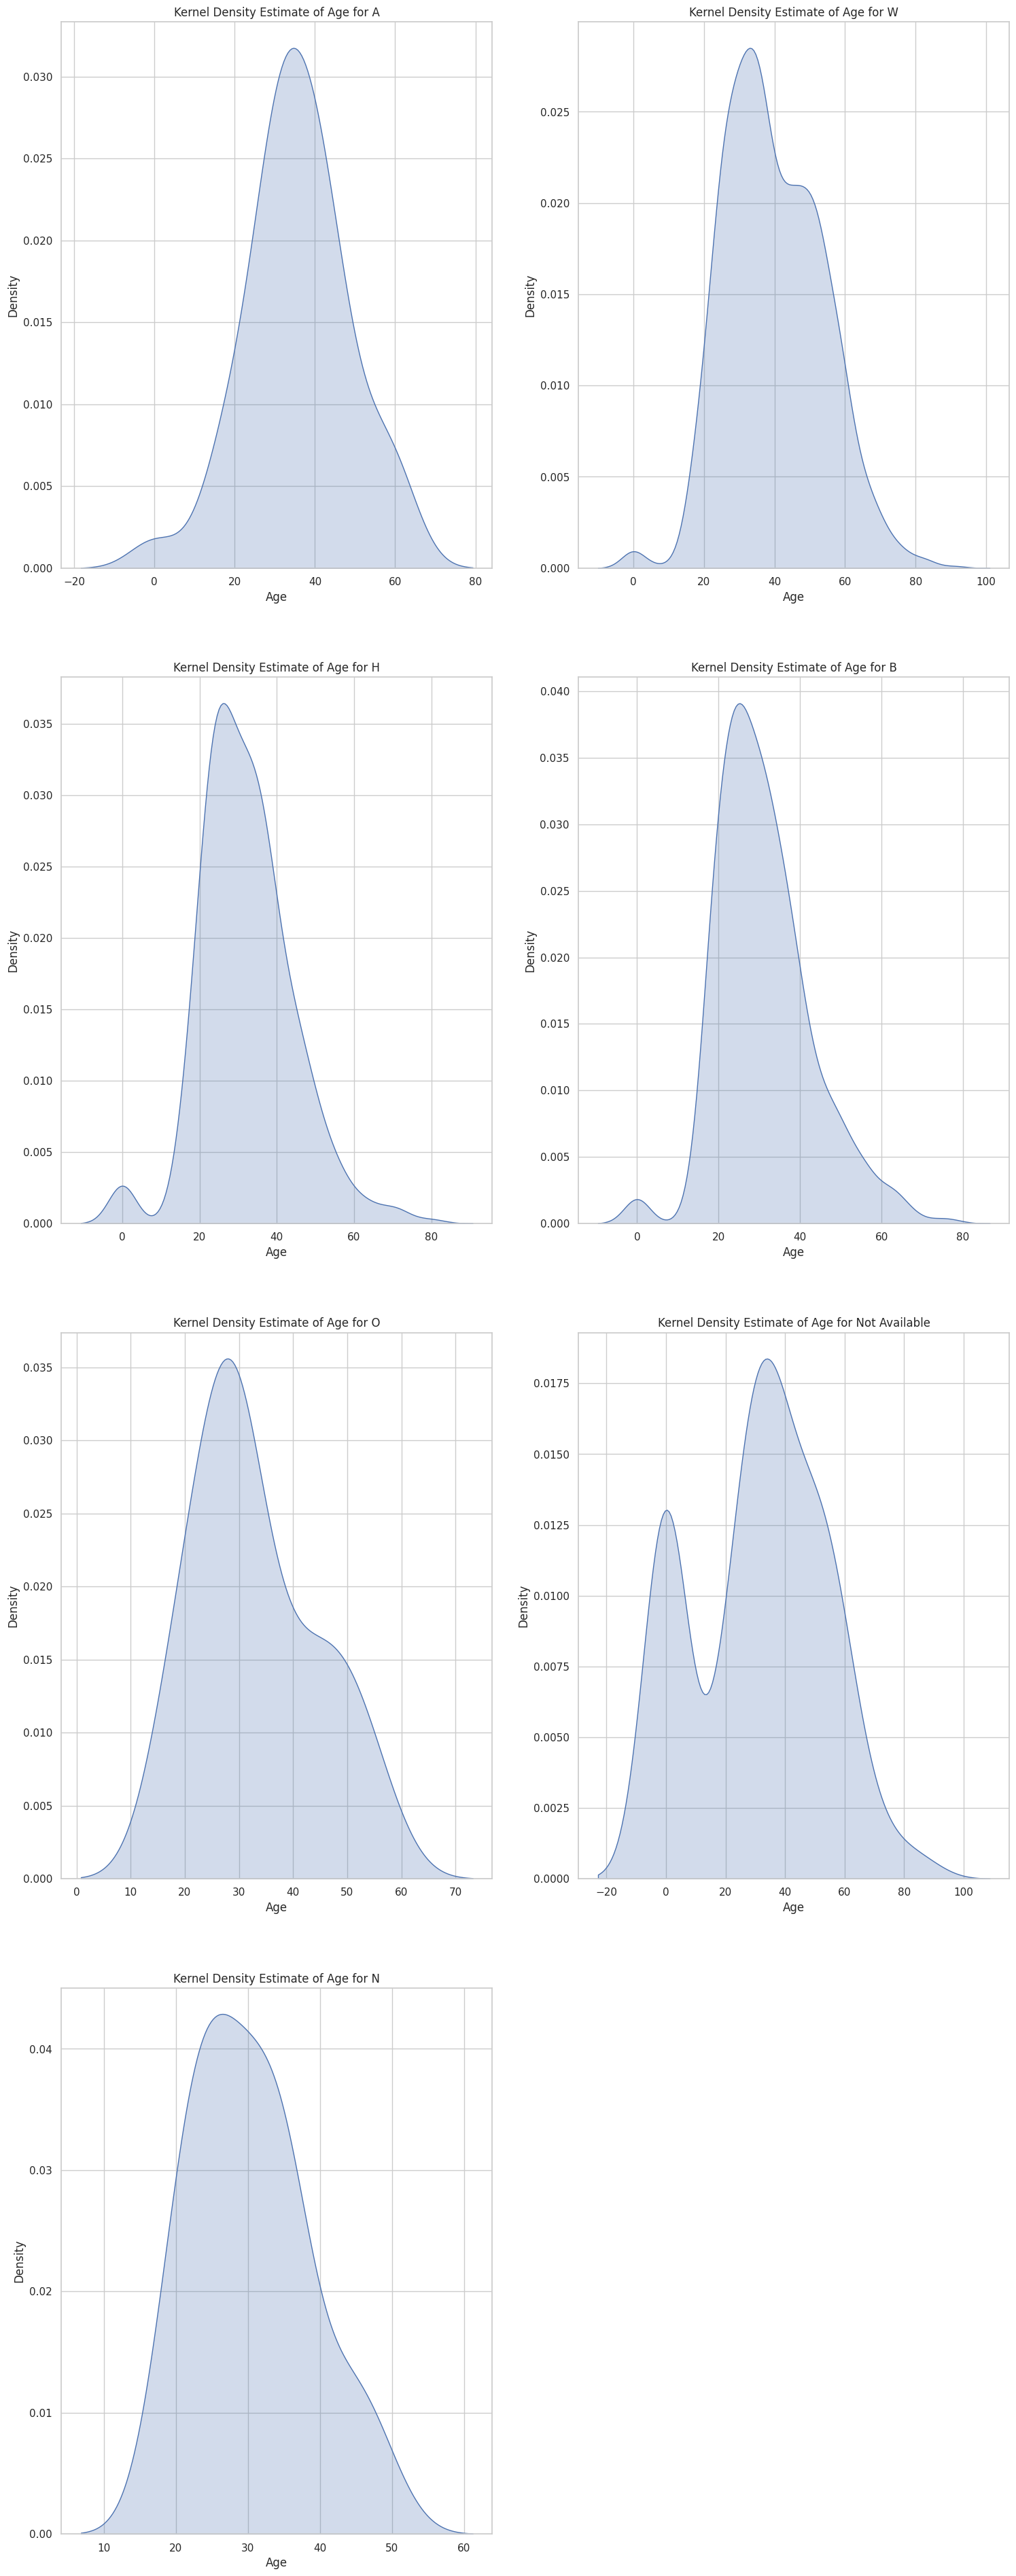

In [ ]:
# the unique races
races = df_fatalities['race'].unique()
num_races = len(races)

# number of rows and columns for the subplots
num_rows = (num_races + 1) // 2
num_cols = 2

# figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 12 * num_rows))
axes = axes.flatten()

# KDE plots for each race
for i, race in enumerate(races):
    race_data = df_fatalities[df_fatalities['race'] == race]['age']
    sns.kdeplot(race_data, fill=True, ax=axes[i])
    axes[i].set_title(f"Kernel Density Estimate of Age for {race}")
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Density')

# unused subplots hidden
for i in range(num_races, len(axes)):
    axes[i].set_visible(False)

plt.show()

Yes there are differences between the distributions for each race it could be seen from the individual KDE plot.

# Race of People Killed

Create a chart that shows the total number of people killed by race.

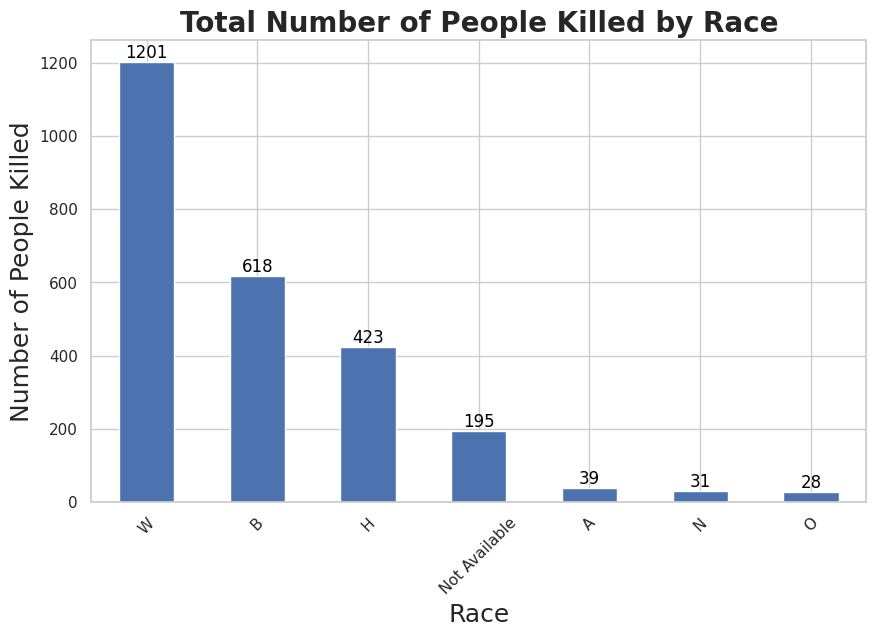

In [ ]:
# the number of people killed by race
race_counts = df_fatalities['race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')

plt.title('Total Number of People Killed by Race',
          fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Race', fontsize=18)
plt.ylabel('Number of People Killed', fontsize=18)

plt.xticks(rotation=45,)

# data labels onto the bars
for i, v in enumerate(race_counts.values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
# number of people with and without signs of mental illness
mental_illness_count = df_fatalities[df_fatalities['signs_of_mental_illness']].shape[0]
no_mental_illness_count = df_fatalities[~df_fatalities['signs_of_mental_illness']].shape[0]
total_count = df_fatalities.shape[0]


In [ ]:
# the percentage of people with mental illness
percentage_with_mental_illness = (mental_illness_count / total_count) * 100
print(f"Percentage of people killed by police who have been diagnosed with a mental illness: {percentage_with_mental_illness:.2f}%")

Percentage of people killed by police who have been diagnosed with a mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
# number of killings per city
city_counts = df_fatalities['city'].value_counts().nlargest(10)

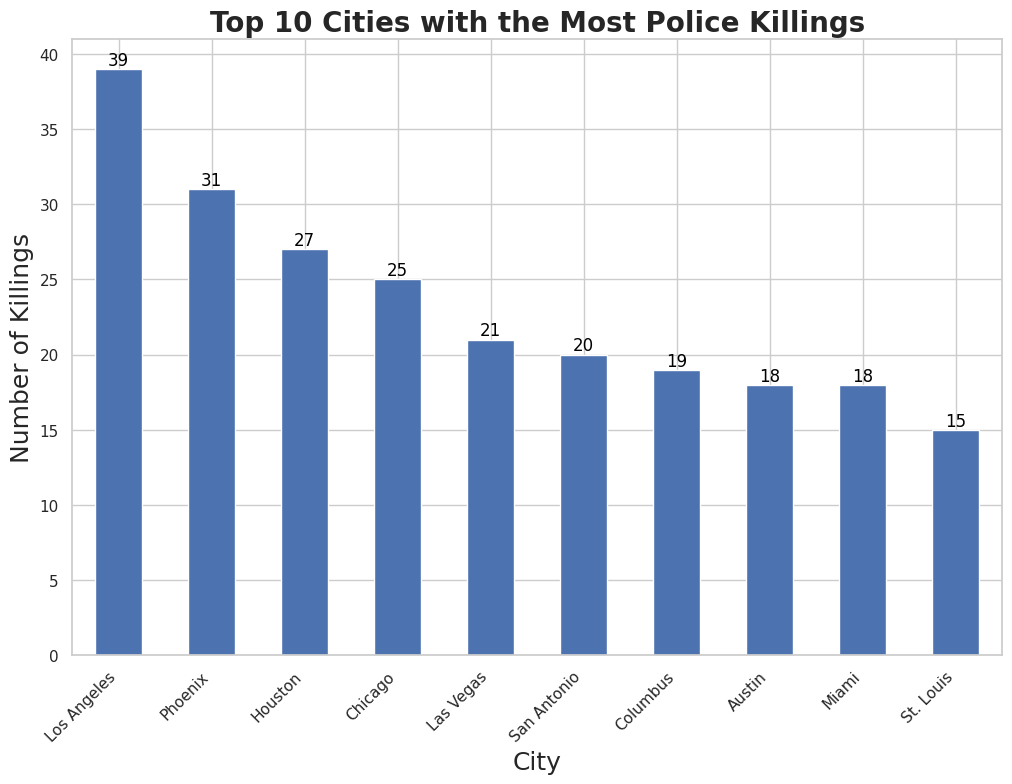

In [ ]:
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar')
plt.title('Top 10 Cities with the Most Police Killings', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('City', fontsize=18)
plt.ylabel('Number of Killings', fontsize=18)
plt.xticks(rotation=45, ha='right')

# data labels onto the bars
for i, v in enumerate(city_counts.values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
# top 10 cities with the most police killings
top_cities = df_fatalities['city'].value_counts().nlargest(10).index

# dataframe with the relevant data for the top 10 cities
top_city_data = df_fatalities[df_fatalities['city'].isin(top_cities)][['city', 'race']]

# share of each race in the top 10 cities
race_shares = top_city_data.groupby(['city', 'race']).size().unstack(fill_value=0)
race_shares = race_shares.div(race_shares.sum(axis=1), axis=0)

print("Race Shares in Top 10 Cities:")
print(race_shares)

Race Shares in Top 10 Cities:
race           A    B    H    N  Not Available    O    W
city                                                    
Austin      0.00 0.17 0.11 0.00           0.00 0.00 0.72
Chicago     0.00 0.84 0.04 0.00           0.04 0.00 0.08
Columbus    0.00 0.58 0.00 0.00           0.05 0.05 0.32
Houston     0.04 0.56 0.22 0.04           0.04 0.00 0.11
Las Vegas   0.00 0.14 0.24 0.00           0.19 0.00 0.43
Los Angeles 0.03 0.26 0.49 0.00           0.08 0.00 0.15
Miami       0.00 0.44 0.33 0.00           0.06 0.00 0.17
Phoenix     0.00 0.06 0.35 0.10           0.10 0.00 0.39
San Antonio 0.00 0.15 0.60 0.00           0.10 0.00 0.15
St. Louis   0.00 0.73 0.00 0.00           0.07 0.00 0.20


In [ ]:
# rate of police killings by race for each city
top_city_counts = df_fatalities[df_fatalities['city'].isin(top_cities)].groupby(['city', 'race']).size()
overall_race_counts = df_fatalities.groupby('race').size()

killing_rates = (top_city_counts / overall_race_counts).unstack(fill_value=0)
killing_rates = killing_rates.div(race_shares, axis=1)

print("\nRate of Police Killings by Race in Top 10 Cities:")
print(killing_rates)


Rate of Police Killings by Race in Top 10 Cities:
race           A    B    H    N  Not Available    O    W
city                                                    
Austin       NaN 0.03 0.04  NaN            NaN  NaN 0.01
Chicago      NaN 0.04 0.06  NaN           0.13  NaN 0.02
Columbus     NaN 0.03  NaN  NaN           0.10 0.68 0.02
Houston     0.69 0.04 0.06 0.87           0.14  NaN 0.02
Las Vegas    NaN 0.03 0.05  NaN           0.11  NaN 0.02
Los Angeles 1.00 0.06 0.09  NaN           0.20  NaN 0.03
Miami        NaN 0.03 0.04  NaN           0.09  NaN 0.01
Phoenix      NaN 0.05 0.07 1.00           0.16  NaN 0.03
San Antonio  NaN 0.03 0.05  NaN           0.10  NaN 0.02
St. Louis    NaN 0.02  NaN  NaN           0.08  NaN 0.01


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
# number of fatalities per state
state_killings = df_fatalities.groupby('state').size().reset_index(name='killings_count')

fig = px.choropleth(state_killings,
                    locations='state',
                    locationmode="USA-states",
                    color='killings_count',
                    color_continuous_scale="Reds",
                    scope="usa",
                    title="Choropleth Map of Police Killings by U.S. State")

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='mixed')

In [ ]:
df_fatalities['date'].head()

,date
0,2015-02-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-04-01


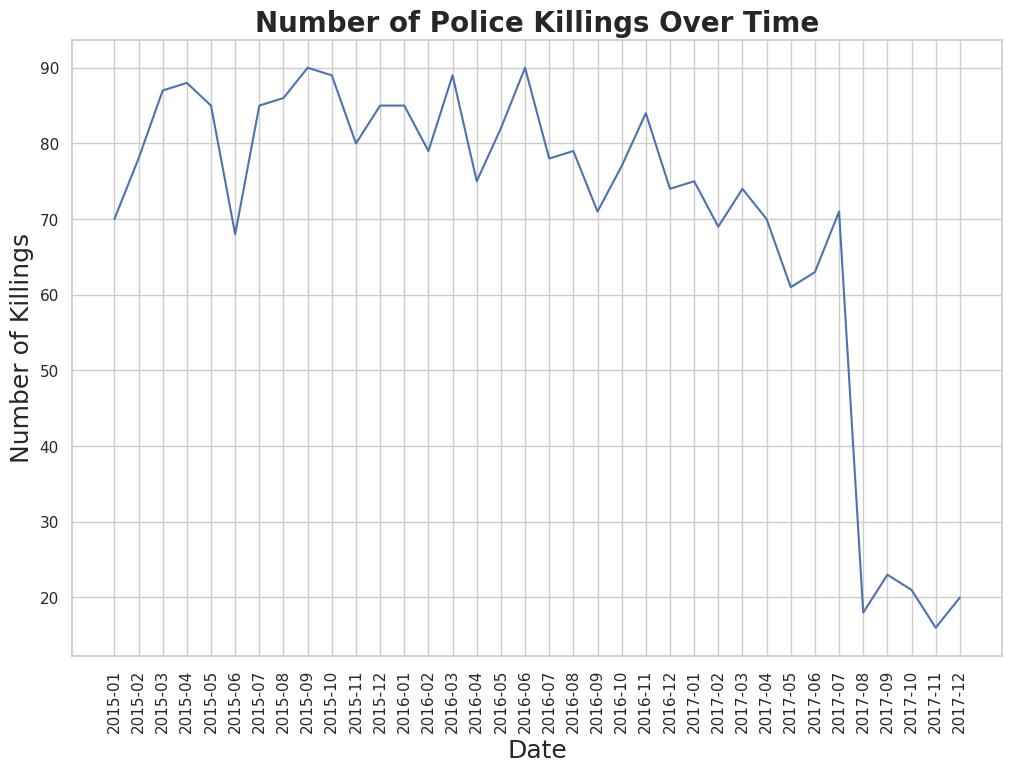

In [ ]:
# Grouping the data by date and count of number of killings
killings_over_time = df_fatalities.groupby(df_fatalities['date'].dt.strftime('%Y-%m')).size().reset_index()
killings_over_time.columns = ['date', 'total_killings']

plt.figure(figsize=(12, 8))
plt.plot(killings_over_time['date'], killings_over_time['total_killings'])
plt.title('Number of Police Killings Over Time', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Killings', fontsize=18)
plt.xticks(rotation=90,)
plt.show()

In [1]:
print("Trend analysis: \nkillings over time has declined from the period January 2015 to December 2017 on monthly basis.")

Trend analysis: 
killings over time has declined from the period January 2015 to December 2017 on monthly basis.


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).